# Problema de Regresión YearPredictionMSD
## **Autor**: Brian Sena Simons 
## **Grupo**: 3ºA - A2.


# Introducción al Problema.

Disponemos de un problema con objetivo de ser capaces de predecir el estreno de una canción a partir de las características de ella. Dentro del data-set disponemos de variadas canciones desde 1922 hasta 2011, con un pico en 2000.

El conjunto de datos es multivariado con un total de medio millón de instancias y 90 atributos de características reales. La tarea es diseñar un método de regresión lineal para realizar las predicciones. 

Como vemos en este caso, similar al anterior, estamos ante un problema de aprendizaje supervisado ya que disponemos de las etiquetas de cada caso. La diferencia es que utilizaremos modelos lineales en "w" con regresión. 

**Se recomienda ver el documento anterior previo a este para las explicaciones de las funciones de las librerías utilizadas**. Lo que haremos es utilizar la librería sklearn y otras para analizar los datos, preprocesar-los y a posterior entrenar y elegir hiperparámetros para finalmente definir el modelo final para nuestra supuesta empresa. 

## Conjunto de datos.

Según la [página oficial](https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD), ya tenemos un conjunto de datos para entreno/test definidos. Sin embargo, realizaremos un análisis sin tener en cuenta esa distribución y luego verificaremos el comportamiento de nuestro modelo sobre el conjunto definido.

Respecto sobre los atributos del conjunto $\mathcal{X}$ disponemos de 90 atributos. 12 de ellos son respecto al timbre de la canción, los 78 otros son respecto a la covarianza entre ellos. El primer valor es el año en el que salió la canción. Como vemos supuestamente, solamente tenemos variables númericas por lo que no tenemos que realizar ningún cambio de variables categóricas como en el problema anterior.

Lo primero que haremos es leer los datos y verificar lo especificado por el website.

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


Una vez montado el drive, a continuación utilizaremos la librería panda ya utilizada en prácticas anteriores para realizar la lectura de los archivos de tipos "txt" en forma de tabla vectorial. 

Una vez leídos, realizaremos una división entre conjunto de test y conjunto de entreno. Y procedemos a preprocesar los datos, verificando el comportamiento de cada atributo, datos faltantes, moda.. con la ayuda de distintas librerías.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

allData = pd.read_csv('/content/drive/MyDrive/datos/YearPredictionMSD.txt',delimiter=',',header=None)

In [ ]:
allYdata = pd.DataFrame(data=allData.values[:,0]);
allData.drop(columns=0,inplace=True)

En este ejercicio no tenemos tampoco que tocar nuestro conjunto de etiquetas $\mathcal{Y}$ ya que son númericas como podemos ver a continuación.

In [ ]:
display(allYdata)

,0
0,2001.0
1,2001.0
2,2001.0
3,2001.0
4,2001.0
...,...
515340,2006.0
515341,2006.0
515342,2006.0
515343,2006.0


Creamos nuestro proprio conjunto entreno/test, y luego procederemos a realizar el debido estudio estadístico de los datos.

Además, visualizamos nuestro conjunto $\mathcal{X}$

In [ ]:
data, test, ydata, ytest =  train_test_split(allData,allYdata,test_size=0.2,random_state=42)
display(data)

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
432804,44.84827,-63.52746,39.62962,4.76874,3.63452,-15.78054,11.35907,-7.77886,19.39953,-3.38522,...,-1.72216,-117.17036,86.56313,58.32602,-1.10826,-5.98171,155.39741,-1.32106,-16.81849,2.63945
14107,40.64447,-132.69806,61.71749,7.65651,-64.88847,-10.53420,14.03082,-0.85293,-13.30655,-10.10274,...,32.31195,111.74395,3.11314,-23.91776,3.58467,-12.76738,31.68369,5.22281,-1.22578,12.82205
445704,42.83931,-62.36282,38.25557,10.82303,11.63044,-24.96657,7.75105,-7.83695,-7.74882,-10.74002,...,130.40625,-52.05532,-1.11332,-50.03516,-29.30650,-46.26227,-186.60942,-8.84056,-106.53343,40.91720
360598,48.06036,-3.44522,7.65788,5.75887,0.64289,-11.55394,19.69670,-0.30330,15.47389,-2.81710,...,-8.50756,-95.76863,44.13172,86.90574,-1.88630,2.83544,-38.33097,2.80345,-96.88037,-9.37875
443245,43.18513,48.78499,-18.89776,-16.00906,-8.71047,-3.88508,-11.62025,-9.23192,-5.87327,-1.11433,...,-4.16870,78.54464,1.76344,27.48088,11.01302,13.12671,-103.15496,-2.30336,27.81066,-2.38488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,44.32199,-23.81309,-13.53284,-20.22994,-8.27441,-13.11242,-7.13980,-2.96502,1.87100,-0.17680,...,38.74888,87.98865,62.25886,-3.28936,2.11499,-80.15949,-126.87331,5.21554,-72.42765,1.92268
365838,55.31715,45.93366,41.56784,-6.89224,-24.65473,-20.43824,7.44115,6.72527,-4.22937,2.10896,...,-3.14755,-31.40562,17.90573,0.87750,2.43974,-0.39560,16.05061,0.23265,57.42801,1.66406
131932,46.28889,23.56662,-9.55045,2.52348,-20.92755,-14.06585,3.47423,-0.59447,3.71155,6.64269,...,3.36283,117.83089,-38.60685,71.93546,22.44123,19.21300,-262.93731,3.20689,-142.63874,-26.27662
146867,43.55954,11.81148,-23.47619,-27.76221,-23.67627,-25.48018,-25.80220,-9.52762,24.17281,9.29710,...,89.18690,-5.00498,19.91281,-17.50665,8.34713,-6.84043,-102.85199,16.61852,-110.42362,25.18114


# Preprocesado de los datos

La idea es ir realizando un estudio estadístico respecto las variables, buscando valores faltantes, valores extremos y fuera de la distribución normal y todos los posibles pequeños fallos y ruidos que puedan haber dentro de nuestro conjunto de datos. 

Lo primero que he decidido hacer es verificar la distribución de datos como en la práctica anterior mediante un histograma.

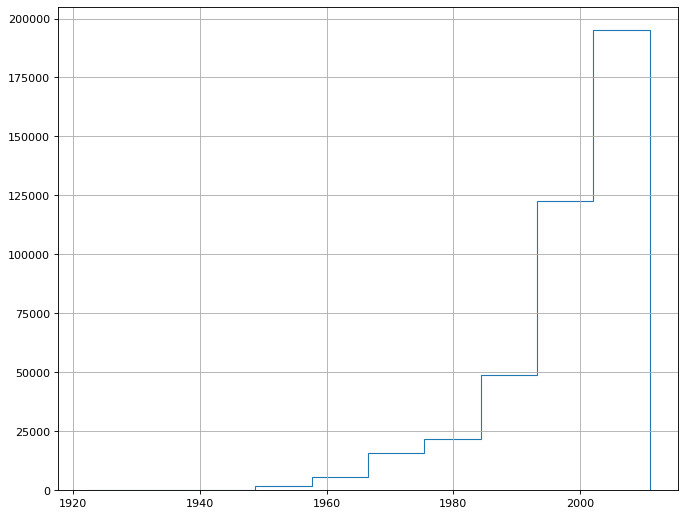

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=80,figsize=(10,8))
plt.hist(ydata.values[:],histtype='step')
plt.grid()
plt.show()

Vemos que tenemos mucho más datos de los últimos años que de anteriormente. Podemos esperar un mejor rendimiento para predecir los datos de los 2000's. Y tendremos que tener cuidado con el rendimiento de nuestro modelo sobre los datos de los años anteriores.

#### Histograma Bonito 

In [ ]:
import matplotlib.pyplot as plt 

def histogram(x,bins,xlabel=""):
  plt.style.use('ggplot')
  fig, ax = plt.subplots(figsize = (10,8))
  if(type(x.values[0])!=str):
    # Plot histogram
    x.plot(kind = "hist", density = True, alpha = 0.65, bins = bins) # change density to true, because KDE uses density
    # Plot KDE
    x.plot(kind = "kde")

        # Quantile lines
    quant_5, quant_25, quant_50, quant_75, quant_95 = x.quantile(0.05), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), x.quantile(0.95)
    quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
    for i in quants:
        ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":",color="blue")
        
    ax.set_xlim(0,100)
    ax.set_xlabel(xlabel) 
    ax.set_ylabel("")
    
    # Annotations
    ax.text(quant_5-.5, 0.012, "5th", size = 10, alpha = 0.8)
    ax.text(quant_25-.25, 0.020, "25th", size = 11, alpha = 0.85)
    ax.text(quant_50-.25, 0.025, "50th", size = 12, alpha = 1)
    ax.text(quant_75-.25, 0.030, "75th", size = 11, alpha = 0.85)
    ax.text(quant_95-.45, 0.036, "95th Percentile", size = 10, alpha =.8)
  else:
    x.value_counts().plot(kind = "bar", alpha = 0.65)
  
  
  # Overall
  ax.grid(False)
  
      # Remove ticks and spines
  ax.tick_params(left = False, bottom = False)
  for ax, spine in ax.spines.items():
      spine.set_visible(False)
      
  plt.show()


## Estudio Estadístico

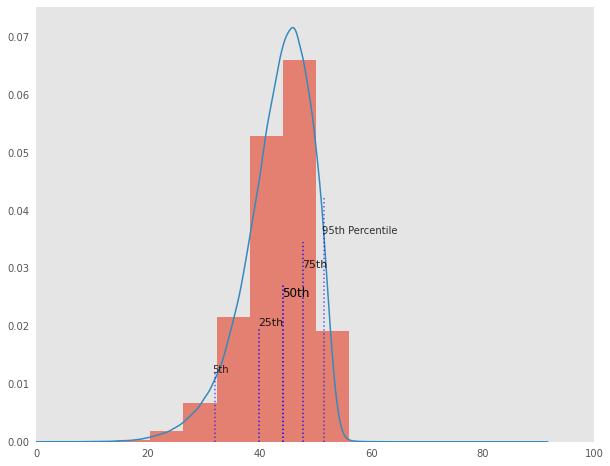

In [ ]:
histogram(data[1],bins=10)

Vemos que para los primeros datos tenemos una distribución bastante regular, similar a una campana gaussiana. Por lo que podremos suponer que no haya problemas con ese atributo, pero habría que indagar.

Sin embargo, si nos ponemos a dibujar el histograma para los 90 atributos...
Mejor optaré por estudiar de manera análitica los resultados utilizando métricas como la media, varianza, mínimos y máximos con ayuda de la librería pandas.

Con eso podremos entender que columnas tienen datos faltantes, que columnas tienen variaciones extrañas y alta desviación de manera más eficaz.

In [ ]:
import numpy as np
import statistics as st
from scipy.stats import skew 

mean_table = data.mean(axis=0,skipna=False)
var_table = data.var(axis=0)
std_table = data.std(axis=0)

In [ ]:
missing_data = np.where(mean_table==np.NaN)
display(missing_data)

(array([], dtype=int64),)

Al parecer no tenemos ningún dato faltante en nuestro conjunto de datos, ya que hemos utilizado la librería pandas con el parámetro "skipna=False" para la media haciendo que si tuvieramos algún valor faltante el valor devuelto por la función sería de tipo "np.NaN" y al filtrar vemos que nos da un vector vacío.

Sin embargo, tenemos varianzas muy grandes en varias componentes, veremos: 

In [ ]:
print("### Análisis de varianza y desviación típica ### ") 
big_var = np.array(np.where(var_table > 1000)[0])
print("Posiciones con alta varianza:\n", big_var, " - Size: " , big_var.shape[0]) 
big_std = np.array(np.where(std_table > 1000)[0])
print("Posiciones con alta desviación:\n ", big_std, " - Size: " , big_std.shape[0]) 
print("#################################################")

### Análisis de varianza y desviación típica ### 
Posiciones con alta varianza:
 [ 1  2 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 76 77 78 79 80 81 82 83
 85 86 88]  - Size:  75
Posiciones con alta desviación:
  [13 14 15]  - Size:  3
#################################################


Vemos con esto que más de la mitad de los datos aparentan tener varianzas y desviaciones típicas grandes. Podemos realizar un análisis con la ayuda de un boxplot y la librería scipy como en la práctica anterior para intentar encontrar los valores extremos: 

In [ ]:
from scipy import stats 
zsc = np.abs(data.select_dtypes(include='number').apply(stats.zscore))
threshold = 3

In [ ]:
cols = list(data.columns)
outliers = []
for col in cols:
  if len(zsc[col][zsc[col]>threshold])>2:
    outliers.append(col)

print("Las columnas con outliers son:", outliers)

Las columnas con outliers son: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


Vemos que como es esperable para un conjunto de datos tan grande es que tenemos miles de supuestos outliers, casi enteramente en todas las columnas.
Con esa información lo que podemos es verificar gráficamente el boxplot que produce nuestros datos: 

### Estudiando atributo balance ### 
Valor mínimo: -337.0925 Mediana: 8.41305 Valor máximo: 384.06573
####################################


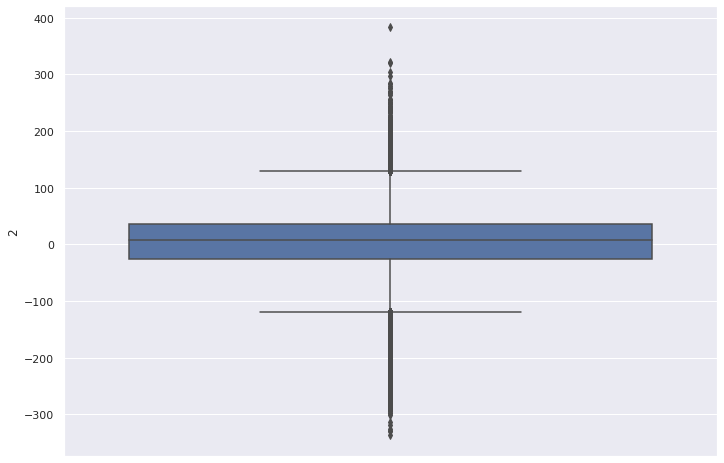

In [ ]:
import seaborn as sns 
max_bal = data[2].max()
min_bal = data[2].min()
median_bal = data[2].median()
print("### Estudiando atributo balance ### " )
print("Valor mínimo:",min_bal,"Mediana:",median_bal,"Valor máximo:",max_bal) 
print("####################################")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(y=data[2])
plt.show()

In [ ]:
uniq_index = np.unique(np.array(np.where(zsc>threshold)[0]))
print("Cantidad de outliers: ",len(uniq_index))

Cantidad de outliers:  114319


Vemos que al parecer tenemos más de 100.000 "outliers". Eso equivale +20% porciento aproximandamente. Por lo que antes de directamente eliminarlos, voy a verificar la correlación entre los valores y los outliers por medio de un análisis multidimensional como mencionado en prácticas.

Como tenemos muchisima cantidad de datos voy a utilizar mejor el IsolationForest en vez de LocalOutlierFactor por el tiempo de cómputo esperado.

In [ ]:
from sklearn.ensemble import IsolationForest
colNames = list(data.columns)
isf = IsolationForest(n_estimators=100,random_state=42,contamination='auto')
preds = isf.fit_predict(data[colNames])
ndata  = pd.DataFrame(data=preds,columns=["iso_forest_outliers"]) 
ndata["iso_forest_outliers"] = ndata["iso_forest_outliers"].astype(str)
ndata["iso_forest_scores"] = isf.decision_function(data[colNames])
print(ndata["iso_forest_outliers"].value_counts())

1     392982
-1     19294
Name: iso_forest_outliers, dtype: int64


Vemos que tenemos un dato muchísimo mejor respecto al número de outliers. Una proporción más adecuada. Realizaré la limpieza de esos datos.

In [ ]:
uniq_index = np.array(np.where(ndata["iso_forest_outliers"].astype(int)<1)[0])
print("Before removing outliers: ",len(data),uniq_index.shape[0])
data = data.drop(data.index[uniq_index])
ydata = ydata.drop(ydata.index[uniq_index])
print("After removing outliers: ",len(data),len(ydata))

Before removing outliers:  412276 19294
After removing outliers:  392982 392982


Hasta aquí llega mi estudio y preprocesado de los datos de partida para el problema de regresión lineal. A partir de ahora vamos a normalizar los datos y realizar la discusión entre modelos.

## Transformaciones de los Datos.

Vamos a normalizar los datos para mejorar el rendimiento de nuestros posibles modelos. Para ello utilizaremos el mismo transformador que en la práctica anterior que hace uso de la media y de la varianza, dónde le resta la primera y divide sobre la segunda para obtener valores dentro de un intervalo adecuado.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Scltransformed = scaler.fit_transform(data)
cols = scaler.get_feature_names_out()
for i,col in enumerate(cols): 
  cols[i] = col[col.find("_")+2:]
tdata = pd.DataFrame(data=Scltransformed,columns=cols)
display(tdata) 

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.186414,-1.323872,0.911415,0.303380,0.488992,-0.478995,0.979163,-0.765625,1.520537,-0.811050,...,-0.567134,-0.333221,0.490896,0.271724,-0.126413,-0.251954,1.203149,-0.447390,-0.220847,0.100105
1,-0.545052,-2.709988,1.578771,0.502302,-2.606905,-0.046202,1.170029,0.155123,-1.710058,-1.870721,...,0.641870,1.200449,-0.318270,-0.757051,0.200392,-0.322970,0.378234,0.110039,-0.120257,0.618446
2,-0.163147,-1.300534,0.869900,0.720425,0.850251,-1.236790,0.721412,-0.773348,-1.161084,-1.971250,...,4.126504,0.103034,-0.359251,-1.083750,-2.090071,-0.673514,-1.077330,-1.087928,-0.799602,2.048617
3,0.745321,-0.119879,-0.054569,0.371585,0.353829,-0.130324,1.574789,0.228192,1.132775,-0.721431,...,-0.808174,-0.189834,0.079463,0.629223,-0.180594,-0.159678,-0.088619,-0.096050,-0.737330,-0.511676
4,-0.102974,0.926767,-0.856913,-1.127881,-0.068759,0.502313,-0.662440,-0.958798,-0.975824,-0.452823,...,-0.654043,0.978022,-0.331357,-0.114114,0.717684,-0.051974,-0.520861,-0.531066,0.067058,-0.155656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392977,0.094840,-0.528032,-0.694819,-1.418633,-0.049058,-0.258890,-0.342365,-0.125663,-0.210872,-0.304930,...,0.870531,1.041294,0.255232,-0.499014,0.098047,-1.028268,-0.679014,0.109420,-0.579584,0.063618
392978,2.008009,0.869629,0.969976,-0.499877,-0.789128,-0.863229,0.699274,1.162586,-0.813445,0.055642,...,-0.617769,0.241382,-0.174835,-0.446891,0.120662,-0.193492,0.273994,-0.315040,0.258121,0.050453
392979,0.437083,0.421414,-0.574496,0.148717,-0.620732,-0.337543,0.415884,0.189484,-0.029068,0.770826,...,-0.386498,1.241230,-0.722804,0.441962,1.513518,0.011723,-1.586280,-0.061684,-1.032520,-1.371855
392980,-0.037827,0.185851,-0.995244,-1.937488,-0.744921,-1.279160,-1.675575,-0.998109,1.992025,1.189552,...,2.662256,0.418260,-0.155373,-0.676856,0.532038,-0.260941,-0.518841,1.080766,-0.824698,1.247580


## Transformaciones del conjunto de test 

Para la transformación sobre el conjunto de "test" tenemos que utilizar nuestro transformador entrenado sobre el conjunto de "entreno" para escalar el conjunto de "test" con las mismas propiedades y evitar el data "snooping" como hicimos y definimos en la práctica anterior.

In [ ]:
tScltransformed = scaler.transform(test)
cols = scaler.get_feature_names_out()
for i,col in enumerate(cols): 
  cols[i] = col[col.find("_")+2:]
tTest = pd.DataFrame(data=tScltransformed,columns=cols)
display(tTest)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,-0.604616,-1.466020,-0.191430,0.435699,-1.975282,-1.248550,2.037326,-0.243303,1.349359,0.700900,...,2.341045,0.784209,-0.506538,-0.458964,0.568676,1.097972,0.087079,2.082471,0.520887,0.487548
1,-0.642252,-1.196378,0.605977,0.575480,-0.183942,0.601074,-0.439874,-0.146113,0.568330,-0.023602,...,0.512377,0.149914,-1.312681,0.529063,-0.072580,0.440431,2.318342,0.713952,0.076520,1.208339
2,0.391533,-0.918659,0.172770,0.869958,-0.557609,0.043433,1.385987,-0.336593,-0.825535,-1.027708,...,-1.016085,0.200423,0.081622,-0.394757,-0.496139,0.441218,-1.419312,0.698174,0.820973,-0.683001
3,-0.572173,1.100114,-0.832894,0.194673,0.415482,0.650560,0.677501,2.643797,-0.554342,1.293110,...,-1.204600,0.144195,-1.646676,0.287051,-0.721681,1.621108,0.478276,-1.184502,-0.648569,-0.236979
4,-0.328095,0.600788,0.760084,-0.348460,0.538766,0.568504,-1.601028,0.130348,-0.582582,-0.604674,...,0.152960,-0.342086,0.325805,1.116974,0.034085,0.236120,1.342190,0.319477,0.651830,0.277280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103064,0.041821,0.507309,-1.110143,-0.322970,-0.824592,0.938797,-0.644792,-0.055787,0.648231,1.405893,...,0.313302,-0.160104,0.411952,-0.889443,1.330207,1.413170,0.727878,0.095751,0.680152,-0.454759
103065,-2.630027,-0.576602,-1.407094,-0.030689,0.488111,0.389446,-0.017262,0.992605,-0.379852,1.011943,...,-0.948903,-0.296646,-1.218681,-1.885915,0.445646,0.351880,-3.752517,-0.024578,0.845891,-2.363600
103066,0.820310,-0.199564,0.165893,-0.183770,-1.133308,-0.077621,0.166721,-0.490318,1.808072,-0.285234,...,-0.481979,-0.475394,-0.252065,0.155779,-0.681096,0.366698,0.281847,0.199924,-0.362350,-0.167731
103067,0.569741,0.993754,-0.848287,1.314445,0.055137,-0.733881,0.457416,3.311368,-1.005920,1.627583,...,-0.622327,-1.538528,-0.719461,-2.972525,-1.986170,1.726922,2.097656,1.600173,1.120401,0.266523


Con los datos supuestamente limpios y normalizados, podemos proceder a verificar el comportamiento de los modelos lineales.

# Discusión de Modelos

Como hemos introducido al principio de este documento, estudiaremos modelos lineales sobre este conjunto de datos. Para evitar tener que implementar-los yo y tener una múltitud de fallos, nos ayudaremos de la librería sklearn como hemos estado haciendo. 

Según la página de [modelos lineales](https://scikit-learn.org/stable/modules/linear_model.html) tenemos una multitud de métodos con los que experimentar, para este ejercicio utilizaré los métodos visto en clase como la regresión lineal, regresión ridge, lasso y elastic-net. (todos modelos lineales).  

## Regresión Lineal.

La teoría de la regresión lineal indica que la idea general es obtener el mejor conjunto de pesos "w" tal que minimizamos lo residual de la suma de los cuadrados entre las predicciones y las etiquetas reales de los datos. 

Matemáticamente estaremos resolviendo un problema de la forma $min_w||Xw-y||_2^2$. El único problema que tenemos que tener cuidado está relacionado con la correlación de las variables. Si estas están correlacionadas la matriz se vuelve sensible a los errores aleatorios que pueda haber en la muestra.

Este es el único de los modelos al cuál no le vamos a aplicar ninguna regularización para comparar con los otros tres que por defecto aplican diferentes regularizaciones. 

Vamos a demás de probar diferentes regularizaciones realizar pruebas respecto a transformaciones sobre el conjunto de datos de entrada.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lr = LinearRegression()
scoring={'MAE':'neg_mean_absolute_error',
         'MSE':'neg_mean_squared_error',
         'R2':'r2',
         'MAX':'max_error'
}
cv = 5
lr_results = cross_validate(lr,tdata,ydata,cv=cv,scoring=scoring)

La razón por la cuál vamos a utilizar como métrica "R2_score" ó métrica R cuadrado es porque ese valor nos indica cuánta variabilidad de las variables dependientes puede ser explicada por el modelo. Es el cuadrado del coeficiente de correlación.

Es equivalente a $1-\frac{\sum_i(y_i-ŷ_i)^2}{\sum_i(y_i-ȳ_i)^2}$. En palabras, uno menos la división entre el error de predicción y el error respecto a la media, ambos al cuadrado. Cuanto mayor mejor, hasta 1. 

Luego mirarmos la bondad general de nuestro modelo utilizando MSE explicado en la introducción. Luego para finalizar utilizaremos MAE, o la suma del error absoluto de predicción para tener una representación maś directa. Por último verificaremos el mayor error que obtenemos. 

In [26]:
display(lr_results)

{'fit_time': array([3.47092247, 3.52579927, 3.55634165, 3.53166866, 3.93816185]),
 'score_time': array([0.03671074, 0.02682638, 0.03567386, 0.02476168, 0.02477288]),
 'test_MAE': array([-6.75269547, -6.73296613, -6.74737769, -6.76165685, -6.70737912]),
 'test_MAX': array([-70.82743761, -71.36368443, -74.99974832, -74.13623713,
        -70.56591683]),
 'test_MSE': array([-90.02001046, -89.07869819, -90.04316653, -89.71314514,
        -88.50830048]),
 'test_R2': array([0.25580483, 0.25502404, 0.25717854, 0.25569968, 0.2561734 ])}

Para este modelo sencillo vemos que hemos podido obtener un error medio de apenas 6 años de diferencia a respecto de una predicción.
Pero vemos que hemos tenido predicciones que fueron un desastre al mirar la métrica del error máximo, alcanzando para algunas predicciones más de 70 años de diferencia, posiblemente resultado del desequilibrio de clases presente en nuestro conjunto de datos. 

Vemos con la métrica R cuadrático que nuestro modelo lineal es realmente mediocre. Un valor r2_score cercano a 0 significa que nuestro modelo lineal no es capaz de lidiar con las oscilaciones que existe en el conjunto de datos. Analizaremos mejor los datos antes de proponer soluciones y para verificar la veracidad de este hecho a medida que avancemos en este documento. 

### Empleo De Baseline 

Para verificar el comportamiento del R cuadrático voy a emplear un baseline equivalente a emplear el valor medio de nuestro conjunto de datos.

In [23]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor(strategy='mean')
dr_results = cross_validate(dr,tdata,ydata,cv=cv,scoring=scoring)

DummyRegressor()

In [24]:
display(dr_results)

{'fit_time': array([0.12687254, 0.12174153, 0.18443704, 0.13137364, 0.12942266]),
 'score_time': array([0.01380634, 0.0137229 , 0.01331782, 0.02049255, 0.01374984]),
 'test_MAE': array([-8.22850346, -8.21165353, -8.2489289 , -8.23096171, -8.18365741]),
 'test_MAX': array([-76.29297517, -76.28124751, -76.29489227, -76.2917878 ,
        -74.28350181]),
 'test_MSE': array([-120.96332488, -119.57403715, -121.21868106, -120.53374188,
        -118.99122599]),
 'test_R2': array([-3.46442846e-06, -1.21825414e-05, -7.45284720e-06, -1.75264004e-06,
        -6.07928216e-06])}

Vemos que los resultados crecen de forma notable de un modelo a otro. Es decir, un modelo tan sencillo como escoger la media no es equiparable al obtenido con el cómputo de la regresión lineal. Fijese en la métrica MSE que ha subido de unos 90 a 120. El error máximo obtenido es del 76 y la media ha crecido de 6 años a 8 años. Además que el R cuadrático indica que ha empeorado lo suficiente como para no realizar predicciones como tal, que tiene sentido dado que siempre dice la media. 

Pero aún no me contento con los resultados y me gustaría seguir indagando en las predicciones obtenidas por regresión lineal ya que me esperaría mejores resultados. 

### Indagando en las predicciones 

In [ ]:
labels = np.unique(ydata.values)
hist_data = {}
for etq in labels:
  indexes = np.array(np.where(ytest==etq)[0])
  if(indexes.shape[0] > 0):
    indexedData = tTest.iloc[indexes]
    ypred = lr.predict(indexedData)
    error = np.sum(np.abs(ypred-ytest.iloc[indexes]))/indexes.shape[0] 
    hist_data[etq] = error[0]


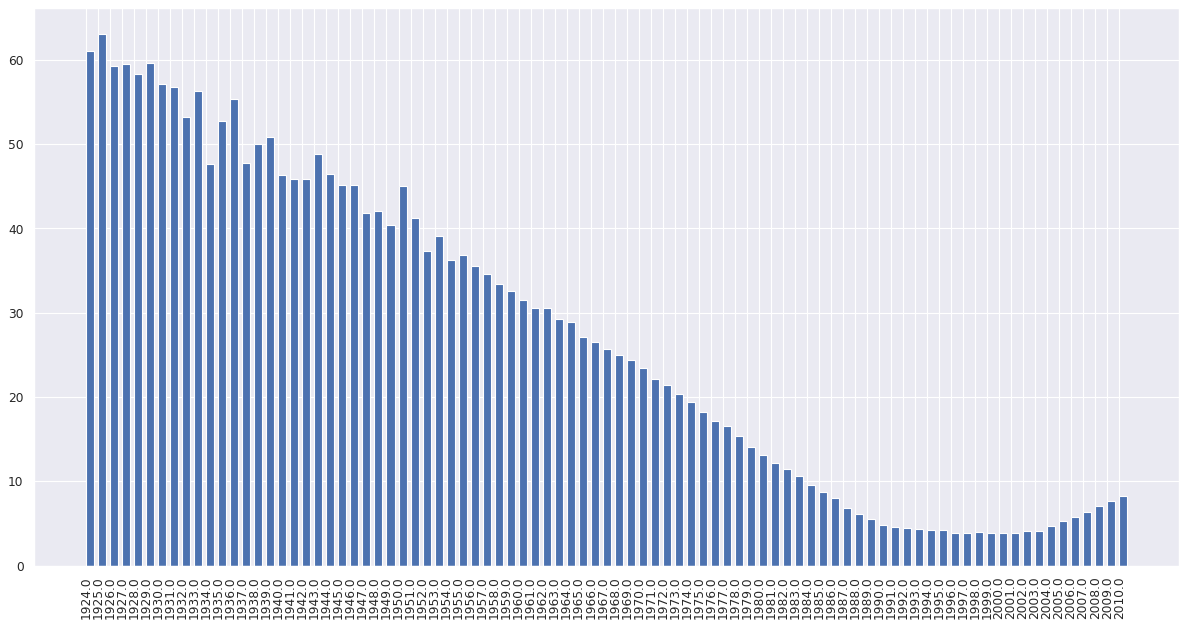

In [ ]:
names = list(hist_data.keys())
values = list(hist_data.values())
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(dpi=80,figsize=(15,8))
xra = (range(len(hist_data)))
nxra = [3*i for i in xra]
plt.bar(nxra,values,tick_label=names,align='edge',linewidth=1,width=2)
for tick in ax.get_xticklabels():
  tick.set_rotation(90)
plt.show()

Como vemos, igual que nos indicaba a priori nuestra distribución de datos del conjunto de entreno, nuestro modelo no ha sido capaz de generalizar para las fechas lejanas. Tenemos muy pocos datos para las fechas de 1922. Y esa distribución ocasiona que nuestro modelo obtenga unas métricas de errores por los cielos. 

No tendría sentido ni siquiera visualizar los demás métodos de regresión ya que obtendrían resultados similares dada la falta de datos y el hecho de su funcionamiento es el mismo que la regresión lineal. Lo único que podríamos mejorar es reducir la complejidad de la predicción utilizando la regularización L1.

Algunas soluciones para un problema de este tipo sería por ejemplo obtener más datos para las fechas lejanas, o directamente descartar esas fechas y producir un modelo para las fechas más actuales donde disponemos de muchísimos más datos y probar a verificar si nuestro modelo obtendría mejores resultados. 

El problema sería que para obtener una nueva cota dado los cambios tendríamos que obtener un nuevo conjunto de datos "test" para verificar su rendimiento.

**Solo por curiosidad**, veremos que pasaría que si elegímos etiquetas para 1980.

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Date = 1980
index = np.array(np.where(ydata>=Date)[0])
grid = GridSearchCV(
    lr,
    cv=cv,
    param_grid={"fit_intercept":[True]},
    scoring=scoring,
    refit='R2'
)
grid.fit(tdata,ydata)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
ypred_test = grid.predict(tdata.iloc[index])
print("### Resultados MSE y R2_SCORE ### ")
print("Mean Squared Error: %2.f" % mean_squared_error(ydata.iloc[index],ypred_test))
print("Coefficiente of determination %2.f" % r2_score(ydata.iloc[index],ypred_test))
print("Mean Absolute Error: %2.f" % mean_absolute_error(ydata.iloc[index],ypred_test))
print("Max Error: %2.f" % max_error(ydata.iloc[index],ypred_test))
print("###############################################")

### Resultados MSE y R2_SCORE ### 
Mean Squared Error: 46
Coefficiente of determination  0
Mean Absolute Error:  5
Max Error: 60
###############################################


Vemos que las demás métricas de error utilizadas mejoran su resultado, por lo que nuestro modelo tiene problemas con la proporción de datos que ocasiona que produzca valores de error desproporcionados, o quizás con el problema en sí que podría ser no-lineal como indica R cuadrático.

Pero en todo caso, la mejor solución sería equilibrar más las clases o implementar algún modelo que sea menos sensible a oscilaciones.

## Ridge Regression

La función de pérdida del modelo es MSE (Mean-squared-error) + l2 penalty. Es decir, utiliza el error cuadrático medio y la regularización l2 que hemos estado comentando en el ejercicio de clasificación.

$MSE = \frac{1}{N}\times\sum_{t=1}^N(y_i-f_i)^2= \frac{SSE}{N}$ Dónde SSE = suma de los errores cuadráticos. 

Este modelo entonces minimiza: $||y - Xw||^2_2 + \alpha \cdot ||w||^2_2$. Lo que nos permitiría probar a reducir los valores que pueden tomar nuestro de nuestra hipótesis. Veremos que concluye con lo anteriormente dicho de que no vamos a poder generalizar con modelos lineales.

¿Cómo funciona [Ridge](https://www.youtube.com/watch?v=qC2UCjKRyZM)?

#### Función de sklearn para printear resultados

En la página oficial de sklearn podemos encontrar la siguiente función que nos ayuda a entender mejor los valores obtenidos por el GridSearch con validación cruzada. Más a respecto en la práctica de clasificación.

In [39]:
def report(results, key,top, n_top=3):
    for i in range(1, n_top + 1):
      candidates = np.flatnonzero(results["rank_test_"+top] == i )
      for candidate in candidates: 
        print("Model with rank: {0}".format(results["rank_test_"+key][candidate]))
        print(
            "Mean " + key + " score: {0:.3f} (std: {1:.3f})".format(
                results["mean_test_"+key][candidate],
                results["std_test_"+key][candidate],
            )
        )
        print("Parameters: {0}".format(results["params"][candidate]))
        print("")

In [45]:
def printMetrics(results,top):
  for key in results.keys():
    index = key.find('test')
    if index>0 and key.find('split0')>=0 and key.find('mean')<0 and key.find('std')<0 and key.find('rank')<0:
      report(results,key[index+5:],top,n_top=1)

### Implementación Ridge

Como en la práctica de clasificación, utilizaremos el GridSearch con validación cruzada para un K=5 para elegir los mejores hiperparámetros para nuestro modelo. Una vez obtenido la mejor combinación procederemos a analizar los datos. 

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

rid = Ridge()
alphas = np.linspace(0.0001,1,10)
rid_parameters = {'alpha':alphas,
                  'fit_intercept':[True,False]
                  }
# cv = número de folds, scoring -> métrica. parameters -> parámetros a probar.
rid_clf = GridSearchCV(
    rid,
    rid_parameters,
    scoring=scoring,
    refit='R2',
    cv=5,
    n_jobs=2)
#scores = cross_val_score(lrm,tdata,ydata,scoring='accuracy',cv=5)
rid_clf.fit(tdata,ydata)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=2,
             param_grid={'alpha': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00]),
                         'fit_intercept': [True, False]},
             refit='R2',
             scoring={'MAE': 'neg_mean_absolute_error', 'MAX': 'max_error',
                      'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

In [46]:
printMetrics(rid_clf.cv_results_,"R2")

Model with rank: 10
Mean MAE score: -6.740 (std: 0.019)
Parameters: {'alpha': 1.0, 'fit_intercept': True}

Model with rank: 1
Mean MSE score: -89.473 (std: 0.595)
Parameters: {'alpha': 1.0, 'fit_intercept': True}

Model with rank: 1
Mean R2 score: 0.256 (std: 0.001)
Parameters: {'alpha': 1.0, 'fit_intercept': True}

Model with rank: 1
Mean MAX score: -72.379 (std: 1.827)
Parameters: {'alpha': 1.0, 'fit_intercept': True}



Vemos que la mejor combinación de hiperparámetros obtenidos es con una regularización L2 con factor de proporción $\alpha=1.0$, es decir, una regularización bastante fuerte. 
Y que además, por casualidad también coincide que con ese mismo hiperparámetro hemos podido obtener los mejores resultados para las demás métricas con excepción del error medio absoluto, pero como en el ejercicio de clasificación tenemos que comprobar si realmente es así o cual es la diferencia.

In [47]:
report(rid_clf.cv_results_,"MAE","MAE")

Model with rank: 1
Mean MAE score: -6.740 (std: 0.019)
Parameters: {'alpha': 0.0001, 'fit_intercept': True}

Model with rank: 2
Mean MAE score: -6.740 (std: 0.019)
Parameters: {'alpha': 0.11120000000000001, 'fit_intercept': True}

Model with rank: 3
Mean MAE score: -6.740 (std: 0.019)
Parameters: {'alpha': 0.2223, 'fit_intercept': True}



Vemos que es erróneo pensar que nuestro modelo no ha optimizado el error medio absoluto ya que coinciden los valores hasta el rango número 10 para distintos valores de alpha. Por lo que hemos logrado optimizar lo máximo posible con nuestro hiperparámetro. 

Y vemos que, como mencionado anteriormente hemos obtenidos resultados casi iguales a los de regresión lineal sin una mejora notable. El método que terminaría por entregar a la empresa sería más bien el con regularización L1 porque almenos podría reducir la complejidad del problema. (Si este consigue los mismos resultados aproximadamente)

### Resultados Obtenidos Ridge

In [ ]:
ypred_test = rid_clf.predict(tTest)
print("### Resultados MSE y R2_SCORE ### ")
print("Mean Squared Error: %2.f" % mean_squared_error(ytest,ypred_test))
print("Coefficiente of determination %2.f" % r2_score(ytest,ypred_test))
print("Mean Absolute Error: %2.f" % mean_absolute_error(ytest,ypred_test))
print("Max Error: %2.f" % max_error(ytest,ypred_test))
print("###############################################")

### Resultados MSE y R2_SCORE ### 
Mean Squared Error: 92
Coefficiente of determination  0
Mean Absolute Error:  7
Max Error: 79
###############################################


Vemos que, como bien indiqué anteriormente en el análisis. Los resultados obtenidos son equivalentes. Y lo mismo seguiría ocurriendo con los demás modelos lineales dado la distribución de datos y la naturaleza del problema. Como mencionado la única diferencia que podríamos encontrar es si utilizamos regularización de tipo L1. 

Dado el comportamiento equivalente, no dibujaré las curvas de aprendizaje. 

 ## Lasso Regression

Saltamos directamente a regresión lineal con regularización de tipo L1 para verificar si podemos reducir la complejidad de nuestra hipótesis manteniendo buenos resultados bajo las condiciones.

Básicamente busca minimizar: $(1 / (2 \cdot n_{samples})) \cdot ||y - Xw||^2_2 + \alpha \cdot ||w||_1$. Es decir, similar a la regularización L2 pero ahora en vez de utilizar la suma al cuadrado de los pesos como restricción, utilizamos la suma de los valores absolutos.

Forzando así que se vayan descartando variables para poder cumplir con la restricción y minimizar el error. 

[Página oficial Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

In [48]:
from sklearn.linear_model import Lasso

lass = Lasso()
#alphas = np.linspace(0.0001,1,10)
alphas = [0.0001,0.001,0.01,0.1,1,10]
# cv = número de folds, scoring -> métrica. parameters -> parámetros a probar.
lass_parameters = {'alpha':alphas,
                  'fit_intercept':[True]
                  }
# cv = número de folds, scoring -> métrica. parameters -> parámetros a probar.
lass_clf = GridSearchCV(
    lass,
    lass_parameters,
    scoring=scoring,
    refit='R2',
    cv=5,
    n_jobs=-1)
lass_clf.fit(tdata,ydata)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=2,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False]},
             refit='R2',
             scoring={'MAE': 'neg_mean_absolute_error', 'MAX': 'max_error',
                      'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

In [49]:
printMetrics(lass_clf.cv_results_,"R2")

Model with rank: 2
Mean MAE score: -6.740 (std: 0.019)
Parameters: {'alpha': 0.001, 'fit_intercept': True}

Model with rank: 1
Mean MSE score: -89.473 (std: 0.594)
Parameters: {'alpha': 0.001, 'fit_intercept': True}

Model with rank: 1
Mean R2 score: 0.256 (std: 0.001)
Parameters: {'alpha': 0.001, 'fit_intercept': True}

Model with rank: 2
Mean MAX score: -72.362 (std: 1.831)
Parameters: {'alpha': 0.001, 'fit_intercept': True}



Vemos que hemos tenido la suerte que para el mismo valor de alpha hemos obtenido los mejores resultados para todas las métricas, que además son exactamente las mismas que anteriormente pero con una reducción de complejidad dada la regularización que podemos comprobar a continuación: 

In [50]:
print("Número de coeficientes igual a 0:", np.count_nonzero(lass_clf.best_estimator_.coef_==0))

Número de coeficientes igual a 0: 2


Hemos podido reducir la complejidad de nuestro problema a 2 atributos menos. 
Por lo que si tuviera que elegir un modelo probablemente sería este.

## Conclusión

Dado los resultados anteriores hemos visto que con un modelo lineal, independientemente de la regularización aplicada sobre él, no hemos podido aprender de nuestro conjunto de datos de manera eficaz. Aún tenemos valores de error bastante elevados y un coeficiente de determinación nulo.

Pero entre ellos, el ganador o el modelo que entregaría a la empresa para que realize sus determinadas pruebas con un conjunto de test sería el modelo Lasso, o regresión lineal con regularización L1. Ya que con menor complejidad sobre la entrada ha podido obtener un mejor rendimiento. 

Los parámetros finales obtenidos serían: 

In [ ]:
print("#### Parámetros finales #### ")
print(lass_clf.best_estimator_.coef_)

#### Parámetros finales #### 
[ 5.32541134e+00 -3.09523512e+00 -1.66009356e+00  1.48988594e-01
 -5.30137602e-01 -3.01408432e+00 -1.86090220e-01 -7.99759512e-01
 -6.42115071e-01 -3.96624998e-02 -8.11580320e-01  3.12637601e-02
  1.05651074e+00  5.68454410e-01 -5.82396452e-01  5.22213276e-01
  1.40427680e-01  7.87750403e-01  4.44549583e-01  8.17937028e-01
 -0.00000000e+00 -2.23910627e-01  1.53648541e+00  4.45454916e-01
 -4.27035371e-01  3.48491095e-02  8.00013912e-01  1.30731621e-01
  1.34581022e-01 -4.20723188e-03 -1.94324435e-01 -1.02026486e-01
 -3.62057148e-01  1.17323431e-01  4.05261206e-02 -5.36855886e-01
 -7.59916262e-02  3.49771462e-01  3.28891206e-01 -3.58640134e-01
 -2.77976281e-01 -1.72946754e-01 -1.54044981e-01 -1.28358619e-01
 -9.66329300e-02  3.58400477e-01  2.11106236e-01 -6.32406328e-01
  2.44520136e-02  2.29865302e-01  2.97649597e-02 -1.38328094e-01
  1.21898675e-02  7.17412788e-02 -2.75921212e-02  5.63892988e-02
 -6.12756695e-01  6.45580077e-01 -2.93839387e-01  1.95091474

Este análisis ha sido posible dado que teníamos una definición clara de los conjuntos de datos disponibles, entre enternamiento y test. Si no lo tuvieramos tendríamos que analizar si disponemos de suficientes datos para realizar la división teniendo en cuenta que un conjunto de test pequeño implica una cota menos fiable pero cuanto mayor menos datos tenemos para entrenar. 

Mientras que si no dividimos tendríamos que estimar la cota fuera de la muestra utilizando la media de los errores obtenidos en el conjunto de valiación de validación cruzada.

Ya que si entrenamos y validamos sobre el mismo conjunto de datos no tendríamos una cota real sobre el rendimiento de nuestro modelo fuera de la muestra. 

## Resultados Obtenidos L1

### Resultados Obtenidos LR 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
ypred_test = lass_clf.predict(tTest)
print("### Resultados MSE y R2_SCORE ### ")
print("Mean Squared Error: %2.f" % mean_squared_error(ytest,ypred_test))
print("Coefficiente of determination %2.f" % r2_score(ytest,ypred_test))
print("Mean Absolute Error: %2.f" % mean_absolute_error(ytest,ypred_test))
print("Max Error: %2.f" % max_error(ytest,ypred_test))
print("###############################################")

### Resultados MSE y R2_SCORE ### 
Mean Squared Error: 92
Coefficiente of determination  0
Mean Absolute Error:  7
Max Error: 79
###############################################


Vemos que nuestros resultados se aproximan bastante a los obtenidos dentro de nuestro conjunto de entrenamiento con excepción del R cuadrático por lo que podemos extrapolar que nuestro modelo no aparenta haber sobre-entrenado aunque tendremos que verificar con las curvas de aprendizaje. 

No hemos obtenido el mejor modelo pero si una buena aproximación en comparación a nuestro modelo de base. 

### Curvas de aprendizaje L1 

Ahora, para hacer las curvas de aprendizaje vistas en teoría...
Primeramente definimos nuestro modelo final con los mismos hiperparámetros y creamos un conjunto de entreno y otro de validación a partir de la librería sklearn que nos permite dividir un conjunto de datos en dos, como hecho anteriormente.

A continuación para un número determinado de veces, vamos a entrenar el modelo sobre un conjunto de datos cada vez más pequeño y vamos ir guardando los errores obtenidos. El error para los modelos de regresión que utilizaré será el MSE, o error cuadrático medio. Lo definimos a continuación:

In [69]:
lass = Lasso(alpha=0.001)

In [91]:
def Ein_loss(y,ypred):
  ypred = ypred[:,np.newaxis]
  return np.sum((ypred-y)**2)/len(y)

In [88]:
from scipy.interpolate import make_interp_spline
def learning_curve_data(clf,k,Xtrain,ytrain,test,ytest,Ein_Loss=None):
  batch_size = int(Xtrain.shape[0]/k)
  x = []
  y = []
  yt = []
  x.append(0)
  y.append(0)
  yt.append(100)
  for i in range(0,Xtrain.shape[0],batch_size):
    dt = Xtrain[0:i+batch_size]
    lb = ytrain[0:i+batch_size]
    x.append(i+batch_size)
    if(Ein_Loss!=None):
      y.append(Ein_Loss(lb,clf.predict(dt)))
      yt.append(Ein_Loss(ytest,clf.predict(test)))
    else:
      y.append(clf.score(dt,lb))
      yt.append(clf.score(test,ytest))
  
  return np.array(x,dtype=object),np.array(y,dtype=object),np.array(yt,dtype=object)

In [96]:
k = 40
xran, ein, eout = learning_curve_data(lass,k,tdata,ydata,tTest,ytest,Ein_Loss=Ein_loss)

In [97]:
def plot_lrcurve(x,y,yt):
  plt.plot(x,y,c="blue",label="E_in")
  plt.plot(x,yt,c="red",label="E_out")
  plt.legend()
  plt.xlabel("Tamaño del conjunto de entrenamiento")
  plt.ylabel("Error esperado")


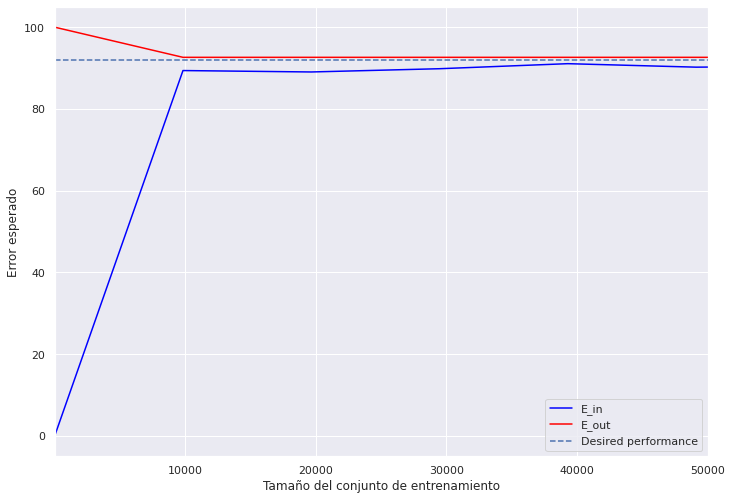

In [101]:
plot_lrcurve(xran,ein,eout)
plt.xlim(0.1,50000)
plt.axhline(92,linestyle='--')
plt.legend(labels=["E_in","E_out","Desired performance"])
plt.show()

Al menos vemos con las curvas de aprendizaje que el resultado obtenido es el que se aproxima realmente al esperado fuera de la muestra. Que para este conjunto de datos con estas transformaciones y estos hiperparámetros este es el rendimiento esperado para nuestro modelo de regressión lineal. 

El error cuadrático esperado es del alrededor del 90 al parecer. Podemos deducir que nuestro modelo ha aprendido correctamente sobre el conjunto de datos sin sobre-entreno y en lo mejor medida que permitía su complejidad de función dada las circunstancias de los datos. 